### Exercise 5: Deutsch-Jozsa algorithm

The idea is to find if a binary function:
$$f:Z_{2^n} \to Z_2$$
that is known to be *constant* (for every x the result is equal, or 0 or 1) or *balanced* (produces the same number of 0s and 1s), is constant or balanced.

In [6]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

Start the Engine and allocate an even number of qubits (by default, 4)

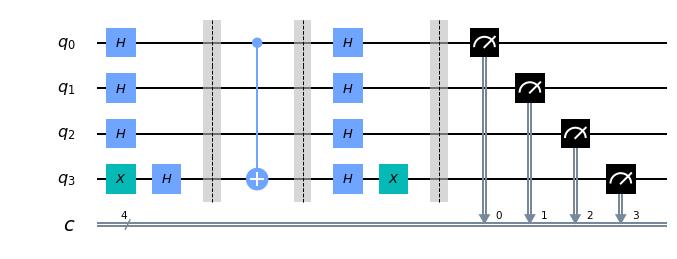

In [7]:
leng = 4

circuit=QuantumCircuit(leng,leng)
circuit.x(3)
circuit.h(range(leng))
circuit.barrier()

# To create an Oracle for the function, it is enough to compute 

circuit.cx(0,3)
circuit.barrier()
#
#Other oracles you can check
#
#X|qreg[0] #Constant
#All(X)|qreg #Constant
#All(Z)|qreg #balanced


circuit.h(range(leng))
circuit.x(3)
circuit.barrier()

circuit.measure((0,1,2,3),(0,1,2,3))
circuit.draw(output='mpl')

Measure the results. If it is **constant**, the result must be |0000>=|0>. If it is **balanced**, the result is different of |0>

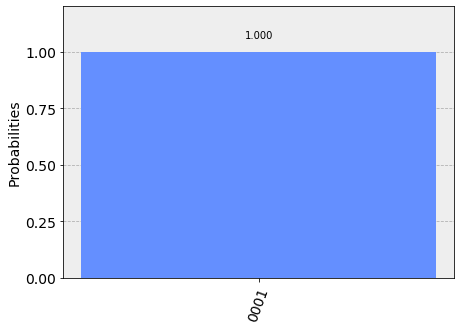

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()

plot_histogram(result.get_counts())

Let us solve this without an ancilla

The idea is to encode the function f(x) as  the phase of the action of a certain oracle $U_f$. Namely, suppose you are able to device  

$$U_f(|x>) = (-1)^{f(x)} |x>$$

Where $$U_f$$ is call oracle. Here we will use a simple case:
$$f(x) = x\%2 $$


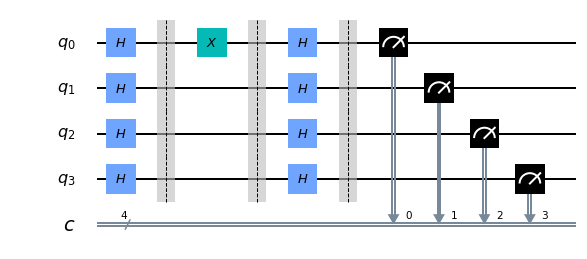

In [13]:
leng = 4

qc=QuantumCircuit(leng,leng)
qc.h(range(leng))
qc.barrier()

# To create an Oracle for the function, it is enought to compute Z applied to first qubit

qc.x(0)
qc.barrier()
#
#Other oracles you can check
#
#X|qreg[0] #Constant
#All(X)|qreg #Constant
#All(Z)|qreg #balanced

qc.h(range(leng))
qc.barrier()

qc.measure((0,1,2,3),(0,1,2,3))
qc.draw(output='mpl')

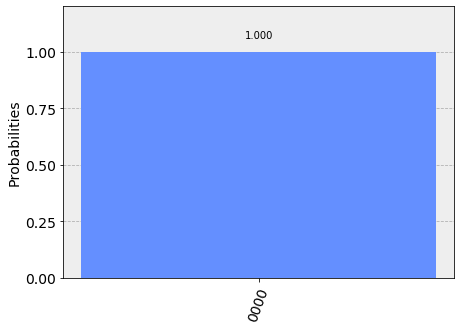

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend=simulator).result()

plot_histogram(result.get_counts())